<a href="https://colab.research.google.com/github/RihaChri/NeuralNetworkNumberRecognition/blob/main/NeuronalNetworkPureNumpy_numberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)
y_train with 10 classes: (60000, 10)
y_test with 10 classes:  (10000, 10)
X_train after slicing: (784, 30000)
y_train after slicing: (10, 30000)
[784, 200, 100, 10]
Cost after iteration 0: 12.632650
Cost after iteration 1: 12.632512
Cost after iteration 2: 12.632376
Cost after iteration 3: 12.632240
Cost after iteration 4: 12.632105
Cost after iteration 5: 12.631972
Cost after iteration 6: 12.631840
Cost after iteration 7: 12.631708
Cost after iteration 8: 12.631577
Cost after iteration 9: 12.631448
Cost after iteration 10: 12.631319
Cost after iteration 11: 12.631192
Cost after iteration 12: 12.631066
Cost after iteration 13: 12.630941
Cost after iteration 14: 12.630817
Cost after iteration 15: 12.630694
Cost after iteration 16: 12.630572
Cost after iteration 17: 12.630451
Cost after iteration 18: 12.630331
Cost after iteration 19: 12.630212
Cost after iteration 20: 12.630095
Cost after iteration 21: 12.62

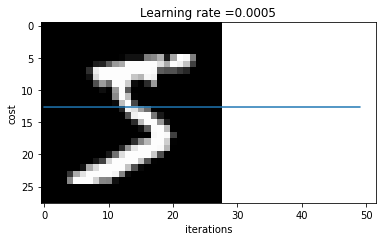

Accuracy: 11.833333333333334
Accuracy: 10.8


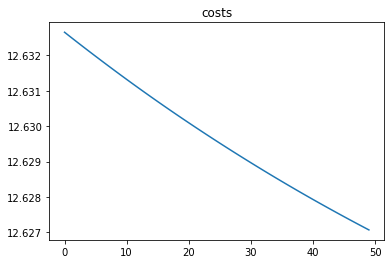

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline


def sigmoid(Z):    
    A = 1/(1+np.exp(-Z))
    cache = Z    
    return A, cache

def relu(Z):   
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def softmax(Z):
    exps = np.exp(Z)
    cache=Z
    return exps / np.sum(exps),Z


def relu_backward(dA, cache):    
    Z = cache
    dZ = np.array(dA, copy=True)  
    dZ[Z <= 0] = 0    
    return dZ

def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)    
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10  
    num_data_to_process = 30000
    dZ=np.zeros((num_data_to_process,10))
    Z=np.transpose(Z)
    for row in range (0,num_data_to_process):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/den           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)
    
    return dZ


def initialize_parameters_deep(layer_dims):

    #np.random.seed(101)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1)) * 0.1
        
    return parameters

def initialize_parameters_he(layer_dims):
    
    np.random.seed(101)
    parameters = {}
    L = len(layer_dims) 
     
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2./layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    cache = (A, W, b)    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A, activation_cache = softmax(Z)
    
    cache = (linear_cache, activation_cache)
    
    return A, cache

def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],activation="relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],activation="softmax")
    caches.append(cache)
            
    return AL, caches

def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    return cost

def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):\
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "softmax":
        dZ = softmax_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    
    return dA_prev, dW, db


def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    M=len(layers_dims)
    current_cache = caches[M-2]
    
    grads["dA"+str(M-1)], grads["dW"+str(M-1)], grads["db"+str(M-1)] = linear_activation_backward(dAL, current_cache, activation = "softmax")#M-1
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
        
    return parameters

def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) 
    p = np.zeros(m)
    
    probas, cache = L_model_forward(X, parameters)

    for i in range(0, probas.shape[0]):
        p = np.argmax(probas,axis=0)

    result = np.mean(np.argmax(probas,axis=0) == np.argmax(y,axis=0))
    print("Accuracy: "  + str(result * 100))
      
    return p

def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost=False,initialization='random'):

    np.random.seed(1)
    costs = []                         
    
    if initialization == "random":
        parameters = initialize_parameters_deep(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
                
        if print_cost: # and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

#----------------------------------------------------


#import MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#unroll
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

#show shape
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

#convert to float
X_train = np.asfarray(X_train)
y_train = np.asfarray(y_train)
X_test = np.asfarray(X_test)
y_test = np.asfarray(y_test)

#Show example
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("example")

#Normalize
X_train = X_train/255
X_test = X_test/255

#Make 10 classes with 0 and 1 instead of one class with 0 - 9
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

#show shape again
print('y_train with 10 classes: ' + str(y_train.shape))
print('y_test with 10 classes:  '  + str(y_test.shape))

#transpose
X_train = X_train.T
y_train = y_train.T

#Slice off the data
num_data_to_process = 30000
X_train = X_train[:,:num_data_to_process]
y_train = y_train[:,:num_data_to_process]

#show shape after slicing
print('X_train after slicing: ' + str(X_train.shape))
print('y_train after slicing: ' + str(y_train.shape))

#train the model
layers_dims = [X_train.shape[0], 200, 100, 10]
print(layers_dims)
parameters, costs = L_layer_model(X_train, y_train, layers_dims,learning_rate=0.0005, num_iterations = 50, print_cost = True, initialization='he')

#costs
costs = np.array(costs)
plt.plot(np.arange(len(costs)), costs)
plt.title("costs")

#predictions
predictions_train = predict(X_train, y_train, parameters)
predictions_test = predict(X_test.T, y_test.T, parameters)